In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense , Flatten
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import random
import os
import cv2
import pickle

from sklearn.model_selection import train_test_split

In [23]:
df= pd.read_csv("train.csv")

In [24]:
from tqdm import tqdm
l1=[]
l2=[] 
for img,ClassId,EncodedPixels in tqdm(df.values):
    image=cv2.imread("train_images/{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(30,30))
    l1.append(image)
    l2.append(ClassId)

100%|██████████████████████████████████████████████████████████████████████████████| 7095/7095 [02:31<00:00, 46.71it/s]


In [25]:
l1

[array([[[ 90,  90,  90],
         [ 70,  70,  70],
         [ 73,  73,  73],
         ...,
         [ 57,  57,  57],
         [ 50,  50,  50],
         [ 50,  50,  50]],
 
        [[ 90,  90,  90],
         [ 71,  71,  71],
         [ 66,  66,  66],
         ...,
         [ 58,  58,  58],
         [ 42,  42,  42],
         [ 50,  50,  50]],
 
        [[ 68,  68,  68],
         [ 69,  69,  69],
         [ 73,  73,  73],
         ...,
         [ 61,  61,  61],
         [ 37,  37,  37],
         [ 51,  51,  51]],
 
        ...,
 
        [[108, 108, 108],
         [ 98,  98,  98],
         [117, 117, 117],
         ...,
         [ 93,  93,  93],
         [ 69,  69,  69],
         [ 55,  55,  55]],
 
        [[118, 118, 118],
         [110, 110, 110],
         [112, 112, 112],
         ...,
         [102, 102, 102],
         [ 67,  67,  67],
         [ 55,  55,  55]],
 
        [[130, 130, 130],
         [130, 130, 130],
         [102, 102, 102],
         ...,
         [ 99,  99,  99],
  

In [26]:
l2

[1,
 3,
 1,
 4,
 3,
 3,
 4,
 4,
 1,
 2,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 4,
 3,
 1,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 4,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 3,
 4,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 1,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 4,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 4,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 1,
 3,
 1,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,


In [27]:
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


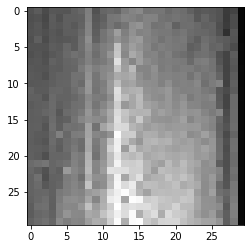

In [28]:
i = 90
plt.imshow(l1[i])


In [89]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encoder = LabelEncoder()

X= np.array(l1)
X = X/255

y = encoder.fit_transform(l2)
y = to_categorical(y)

In [90]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [91]:
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (5676, 30, 30, 3)
x_test shape: (1419, 30, 30, 3)
y_train shape: (5676, 4)
y_test shape: (1419, 4)


In [121]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
model = Sequential([
    Conv2D(16,(3,3),activation ='relu',input_shape=(30,30,3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512,activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256,activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128,activation="relu"),
    BatchNormalization(),
    Dropout(rate=0.5),
    Dense(4,activation="softmax")
])

In [122]:
from tensorflow.keras.optimizers import Adam
lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy'])


In [123]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_32 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_40 (Conv2D)          (None, 9, 9, 128)       

In [124]:
from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [125]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

model_ima = model.fit(aug.flow(X_train,y_train,batch_size=128),epochs=epochs,validation_data=(X_test,y_test),verbose=1,callbacks=[lrd,mcp,es])


Epoch 1/30
45/45 [==============================] - 15s 312ms/step - loss: 1.7586 - accuracy: 0.3633 - val_loss: 1.1272 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 2/30
45/45 [==============================] - 13s 296ms/step - loss: 1.2562 - accuracy: 0.5183 - val_loss: 0.9573 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 3/30
45/45 [==============================] - 13s 300ms/step - loss: 1.0702 - accuracy: 0.6084 - val_loss: 0.9140 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 4/30
45/45 [==============================] - 14s 300ms/step - loss: 0.9381 - accuracy: 0.6656 - val_loss: 0.8973 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 5/30
45/45 [==============================] - 14s 302ms/step - loss: 0.8430 - accuracy: 0.7042 - val_loss: 0.9126 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 6/30
45/45 [==============================] - 14s 304ms/step - loss: 0.7959 - accuracy: 0.7149 - val_loss: 0.9052 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 7/30
45/45 [==============================] - 14s 303ms/st

In [138]:
Evaluate = model.evaluate(X_test, y_test)

45/45 [==============================] - 1s 17ms/step - loss: 0.5739 - accuracy: 0.7498


In [146]:
predict_x = model.predict(X_test) 
classes_x = (np.argmax(predict_x,axis=1))

In [147]:
classes_x

array([3, 2, 2, ..., 2, 2, 2], dtype=int64)

In [148]:
set(classes_x)

{0, 1, 2, 3}

In [149]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [150]:
y_test1 = np.argmax(y_test,axis=1)

In [151]:
y_test1

array([2, 2, 2, ..., 2, 3, 0], dtype=int64)

In [152]:
prediction = model.predict(X_test)

In [153]:
prediction

array([[0.00175603, 0.00164809, 0.4796767 , 0.5169192 ],
       [0.02697765, 0.01349598, 0.5681127 , 0.39141372],
       [0.06782403, 0.08812734, 0.7837588 , 0.06028985],
       ...,
       [0.00581283, 0.00188466, 0.5499076 , 0.44239488],
       [0.00828216, 0.00767301, 0.4942566 , 0.48978814],
       [0.289888  , 0.01817542, 0.63513845, 0.05679811]], dtype=float32)

In [154]:
cm =confusion_matrix(classes_x,y_test1)

In [155]:
cm

array([[ 33,   0,  16,   1],
       [  3,  15,   4,   0],
       [143,  35, 984, 127],
       [  0,   0,  26,  32]], dtype=int64)

In [160]:
from sklearn.metrics import classification_report
print(classification_report(classes_x,y_test1))

              precision    recall  f1-score   support

           0       0.18      0.66      0.29        50
           1       0.30      0.68      0.42        22
           2       0.96      0.76      0.85      1289
           3       0.20      0.55      0.29        58

    accuracy                           0.75      1419
   macro avg       0.41      0.66      0.46      1419
weighted avg       0.89      0.75      0.80      1419

